# Imports

In [1]:
from utils import *
import warnings
warnings.filterwarnings('ignore')

# Loading data

In [2]:
df = pd.read_csv('ofertas_relampago.csv') 

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usag

Las columnas *OFFER_START_DATE*, *OFFER_START_DTTM* y *OFFER_FINISH_DTTM* deberian ser datetime.

Las vamos a convertir luego con una funcion llamada **tweak function**

Asi mismo, vamos a investigar los NULL values que aparecen en *SOLD_AMOUNT* y *SOLD_QUANTITY*

## NULL values

In [4]:
df[df['SOLD_AMOUNT'].isna()]

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
5,2021-06-22,2021-06-22 18:00:00+00:00,2021-06-23 01:00:12+00:00,lightning_deal,23,23,NaN,NaN,A,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
6,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,10,10,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
8,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,lightning_deal,10,-1,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
11,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:00:04+00:00,lightning_deal,15,15,NaN,NaN,NaN,none,ELECTRONICS,CE,MLM-ELECTRONIC_PRODUCTS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48736,2021-06-19,2021-06-19 15:00:00+00:00,2021-06-19 23:00:00+00:00,lightning_deal,10,10,NaN,NaN,A,free_shipping,MOBILE,CE,MLM-TELEPHONES
48738,2021-06-19,2021-06-19 15:00:00+00:00,2021-06-19 23:00:01+00:00,lightning_deal,10,10,NaN,NaN,A,free_shipping,MOBILE,CE,MLM-TELEPHONES
48739,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 21:00:00+00:00,lightning_deal,30,30,NaN,NaN,A,none,HOME&DECOR,HOME & INDUSTRY,MLM-MIRRORS
48742,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-DECORATIVE_PAINTINGS


Los valores nulos en ambas columnas mencionadas anteriormente parecen ser cuando todas las unidades en stock que se pusieron en la oferta se vendieron

In [5]:
#Veamos el porcentaje de ocurrencias de cada valor de diferencia entre REMAINING_STOCK_AFTER_END y INVOLVED_STOCK
((df[df['SOLD_AMOUNT'].isna()]['REMAINING_STOCK_AFTER_END'] - 
  df[df['SOLD_AMOUNT'].isna()]['INVOLVED_STOCK']
 )
 .value_counts() / len(df[df['SOLD_AMOUNT'].isna()])
 * 100 #*100 para mostrar valores en %
)

 0     97.566930
-1      0.736542
-2      0.368271
-5      0.314478
-3      0.202756
-15     0.177929
-6      0.132412
-4      0.115860
-9      0.070344
-13     0.066206
-7      0.057930
-16     0.049654
-8      0.045517
-11     0.020689
-10     0.016551
-14     0.008276
-17     0.008276
-18     0.008276
-21     0.004138
-26     0.004138
-27     0.004138
-40     0.004138
-32     0.004138
-12     0.004138
-38     0.004138
-22     0.004138
dtype: float64

El 97.6% de los datos con NULL values en SOLD_AMOUNT tienen diferencia 0 entre el stock publicado en venta y el stock remamente luego de la oferta (se vendio todo lo que se publico).

Por lo que una buena estrategia seria imputar el valor 0 a todos los *SOLD_AMOUNT* y *SOLD_QUANTITY* NULL values

Vamos a ver si hay ofertas que hayan vendido todo el stock pero que NO tengan NULL values en SOLD_AMOUNT

In [6]:
#Filtramos todas aquellas observaciones donde el stock inicial y final son el mismo (se vendieron todas las unidades)
#pero que NO tengan valor NULO en SOLD AMOUNT (o SOLD QUANTITY)
df[df['INVOLVED_STOCK']== df['REMAINING_STOCK_AFTER_END']][~df['SOLD_AMOUNT'].isna()]

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
394,2021-06-22,2021-06-22 18:00:00+00:00,2021-06-23 01:00:01+00:00,lightning_deal,40,40,28.46,3.0,A,free_shipping,PERSONAL CARE,BEAUTY & HEALTH,MLM-FACIAL_SKIN_CARE_PRODUCTS
544,2021-06-22,2021-06-22 14:00:00+00:00,2021-06-22 22:00:00+00:00,lightning_deal,30,30,4.22,1.0,A,none,TOOLS AND CONSTRUCTION,HOME & INDUSTRY,MLM-TOOL_AND_CONSTRUCTION_SUPPLIES
1033,2021-07-08,2021-07-08 07:00:00+00:00,2021-07-08 13:00:05+00:00,lightning_deal,15,15,5.40,1.0,NaN,none,ELECTRONICS,CE,MLM-GAME_CONSOLES
1733,2021-07-08,2021-07-08 07:00:00+00:00,2021-07-08 13:00:01+00:00,lightning_deal,5,5,5.23,1.0,NaN,free_shipping,ELECTRONICS,CE,MLM-GAME_CONSOLES_VIDEO_GAMES_AND_ARCADE_MACHINES
1860,2021-07-08,2021-07-08 19:00:00+00:00,2021-07-09 01:00:01+00:00,lightning_deal,15,15,6.03,1.0,NaN,none,APPAREL,APP & SPORTS,MLM-PAJAMAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47137,2021-07-06,2021-07-06 13:00:00+00:00,2021-07-06 19:00:04+00:00,lightning_deal,10,10,4.55,1.0,NaN,free_shipping,SPORTS,APP & SPORTS,MLM-FOOTBALL_SHIRTS
47167,2021-07-06,2021-07-06 19:00:00+00:00,2021-07-07 01:00:05+00:00,lightning_deal,15,15,1.33,1.0,NaN,none,FOODS,CPG,MLM-CHOCOLATES
47189,2021-07-06,2021-07-06 07:00:00+00:00,2021-07-06 13:00:01+00:00,lightning_deal,15,15,2.53,1.0,NaN,none,APPAREL ACCESORIES,APP & SPORTS,MLM-NECKLACES
48570,2021-06-19,2021-06-19 19:00:00+00:00,2021-06-20 01:00:05+00:00,lightning_deal,5,5,5.21,4.0,NaN,none,SPORTS,APP & SPORTS,MLM-KINESIOLOGY_TAPES


Estas 213 obervaciones presentan inconsistencias (0.4% del total de ofertas en el dataset).

En caso de avanzar con algun analisis mas profundo, deberiamos tomar alguna decision con estos datos:
* Eliminarlos
* Imputar un valor 0 en *SOLD_AMOUNT* y *SOLD_QUANTITY*
* Imputar el valor en *REMAINING_STOCK_AFTER_END* que sea la diferencia entre *INVOLVED_STOCK* y *SOLD_QUANTITY*

## Columnas categoricas

Vamos a ver la distribucion de las columnas categoricas:
* *SHIPPING_PAYMENT_TYPE*
* *DOM_DOMAIN_AGG1*
* *VERTICAL*
* *DOMAIN_ID*

In [7]:
df.SHIPPING_PAYMENT_TYPE.value_counts()

free_shipping    26658
none             22088
Name: SHIPPING_PAYMENT_TYPE, dtype: int64

In [8]:
df.DOM_DOMAIN_AGG1.value_counts()

HOME&DECOR                      6742
APPAREL ACCESORIES              4387
APPAREL                         3856
COMPUTERS                       3770
SPORTS                          3289
PHARMACEUTICS                   3035
ELECTRONICS                     3018
PERSONAL CARE                   3016
MOBILE                          1841
AUTOPARTS                       1696
FOOTWEAR                        1516
TOOLS AND CONSTRUCTION          1491
TOYS AND GAMES                  1426
STATIONARY                      1259
INDUSTRY                        1199
BEAUTY EQUIPMENT                1099
FOODS                            858
PERSONAL HYGIENE                 840
BABY                             801
MOTOPARTS                        641
BOOKS, MULTIMEDIA & OTHER E!     498
PETS FOOD                        487
PARTY                            397
CLEANING                         360
SECURITY                         320
PET PRODUCTS                     257
SUPLEMENTS                       193
B

In [9]:
df.VERTICAL.value_counts()

APP & SPORTS       13241
HOME & INDUSTRY    11011
CE                  8629
BEAUTY & HEALTH     7150
CPG                 2714
T & B               2624
ACC                 2573
ENTERTAINMENT        525
OTHERS               279
Name: VERTICAL, dtype: int64

In [10]:
df.DOMAIN_ID.value_counts()

MLM-SURGICAL_AND_INDUSTRIAL_MASKS            1759
MLM-HEADPHONES                                761
MLM-LED_STRIPS                                518
MLM-SUNGLASSES                                472
MLM-VEHICLE_LED_BULBS                         454
                                             ... 
MLM-INSECT_KILLER_LIGHTS                        1
MLM-WATERING_CANS                               1
MLM-BASEBALL_AND_SOFTBALL_FIELDING_GLOVES       1
MLM-HABERDASHERY_BEADS                          1
MLM-ELECTRIC_SANDWICH_MAKERS                    1
Name: DOMAIN_ID, Length: 1266, dtype: int64

## Tweak function

In [11]:
def tweak_function(df: pd.DataFrame):
    """Algunos ajustes iniciales al dataset,
    convertimos las primeras columnas a datetime
    y completamos con 0 los NULL values"""
    return (df
            .assign(OFFER_START_DATE =  pd.to_datetime(df['OFFER_START_DATE']),
                   OFFER_START_DTTM =  pd.to_datetime(df['OFFER_START_DTTM']),
                   OFFER_FINISH_DTTM =  pd.to_datetime(df['OFFER_FINISH_DTTM']),
                    SOLD_AMOUNT = df['SOLD_AMOUNT'].fillna(0),
                    SOLD_QUANTITY = df['SOLD_QUANTITY'].fillna(0)
                   )
           )

In [12]:
df = tweak_function(df)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   OFFER_START_DATE           48746 non-null  datetime64[ns]     
 1   OFFER_START_DTTM           48746 non-null  datetime64[ns, UTC]
 2   OFFER_FINISH_DTTM          48746 non-null  datetime64[ns, UTC]
 3   OFFER_TYPE                 48746 non-null  object             
 4   INVOLVED_STOCK             48746 non-null  int64              
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64              
 6   SOLD_AMOUNT                48746 non-null  float64            
 7   SOLD_QUANTITY              48746 non-null  float64            
 8   ORIGIN                     11316 non-null  object             
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object             
 10  DOM_DOMAIN_AGG1            48746 non-null  object             
 11  VE

## Feature engineering

Vamos a crear dos features para extraer insights interesantes de la performance (por cantidad de unidaes venidas y por monto vendido) por cada una de las categorias

In [14]:
df['sold_amount_rate_by_hour'] = (df.SOLD_AMOUNT / ((df.OFFER_FINISH_DTTM - df.OFFER_START_DTTM)
                                                    .dt
                                                    .total_seconds()/60/60    #Para convertir la duracion de la oferta a horas
                                                   )
                                 ).fillna(0) #Para imponer valor 0 en aquellas observaciones con 0 horas de duracion de oferta

In [15]:
df['sold_quantity_rate_by_hour'] = (df.SOLD_QUANTITY / ((df.OFFER_FINISH_DTTM - df.OFFER_START_DTTM)
                                                        .dt
                                                        .total_seconds()/60/60    #Para convertir la duracion de la oferta a horas
                                                       )
                                   ).fillna(0) #Para imponer valor 0 en aquellas observaciones con 0 horas de duracion de oferta

Ademas, vamos a crear una feature con el dia de la semana y la hora del dia cuando empieza la oferta

In [16]:
df['offer_day'] = df.OFFER_START_DATE.dt.day_name()

In [27]:
df['offer_start_hour'] = df.OFFER_START_DTTM.dt.hour

## Analisis Bivariado

Vamos a realizar un analisis exploratorio para ver como se comportan las diferentes categorias de negocio respecto a las dos variables que creamos: 

* **sold_amount_rate_by_hour** (caso 1) 
* **sold_quantity_rate_by_hour** (caso 2)

### Caso 1: sold_amount_rate_by_hour

In [37]:
iv_df , _ = data_vars(df[['SHIPPING_PAYMENT_TYPE','VERTICAL','DOM_DOMAIN_AGG1']],df['sold_amount_rate_by_hour'])

#### VERTICAL

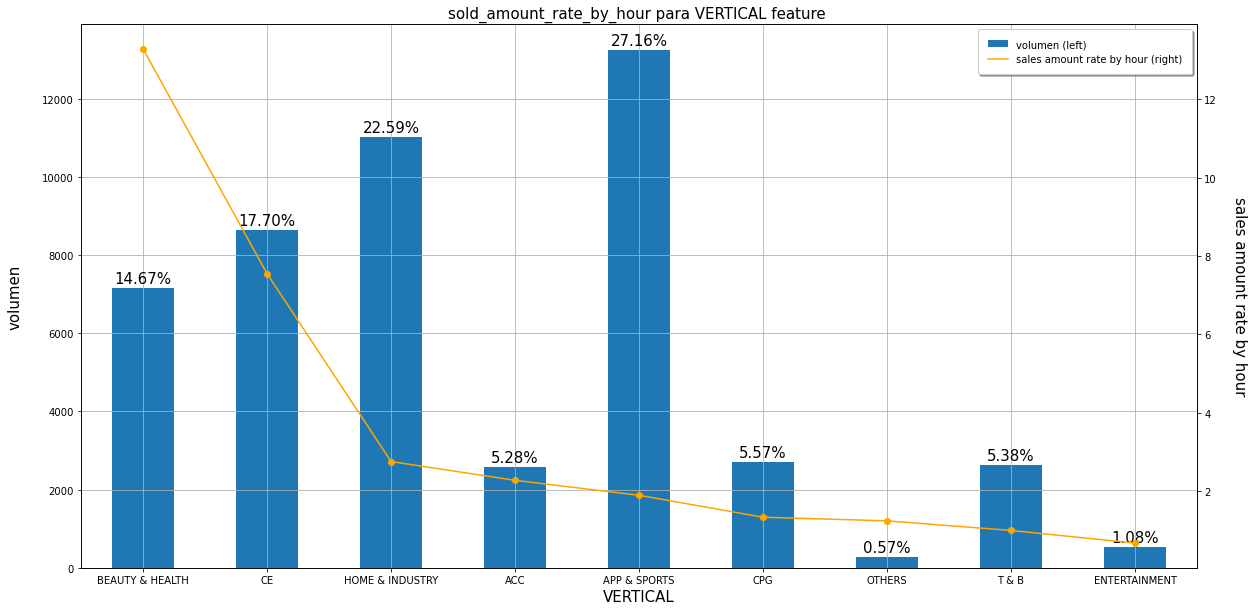

In [38]:
plot_bivariant(iv_df, 'VERTICAL', 'VERTICAL','sold_amount_rate_by_hour' )

- Beauty & Health es la vertical con un mejor rendimiento en terminos de monto vendido por hora. Le sigue CE.

- Luego vemos un comportamiento mas o menos similar entre todas las otras verticales. Importante destacar que Beauty practicamente que cuadriplica (4x) la tasa de Home & Industry, y una diferencia mayor con las otras verticales de negocio.

- En termino de Volumen, APP&SPORTS se lleva la mayor cantidad de ofertas publicadas

#### SHIPPING_PAYMENT_TYPE

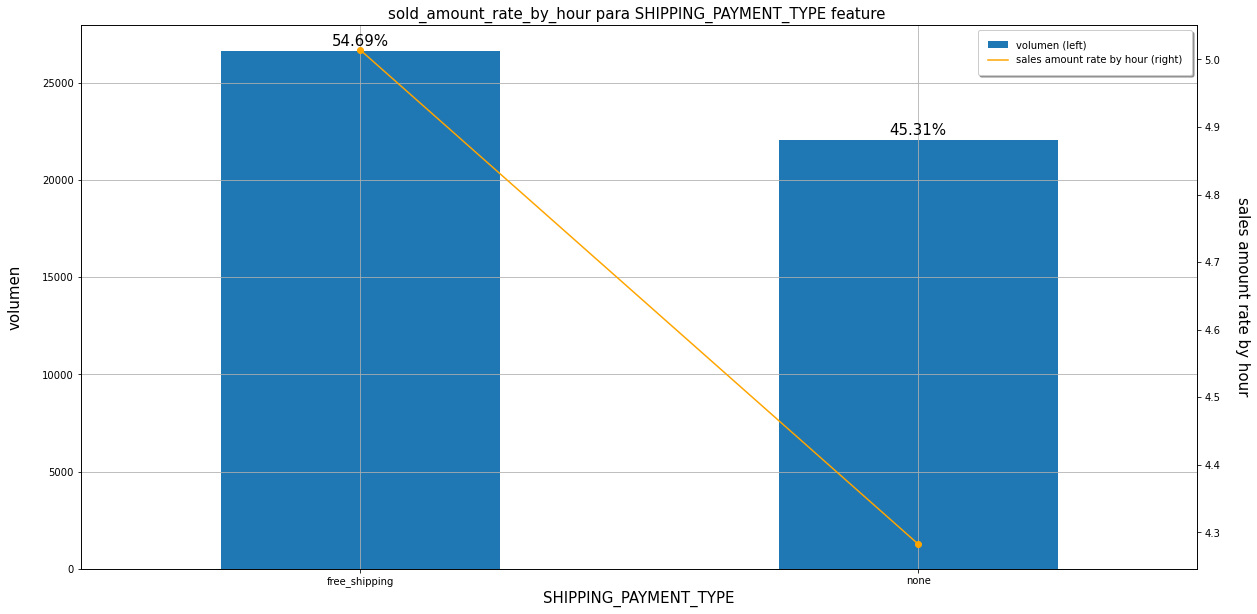

In [22]:
plot_bivariant(iv_df, 'SHIPPING_PAYMENT_TYPE', 'SHIPPING_PAYMENT_TYPE','sold_amount_rate_by_hour')

- Aqui no sabemos si SHIPPING_PAYMENT_TYPE = None es que no tiene free_shipping o implica que no hay informacion.
- Si suponemos lo primero, es de esperar que el free shipping tenga un mayor monto venido por unidad de tiempo que cuando no es gratis

#### DOM_DOMAIN_AGG1

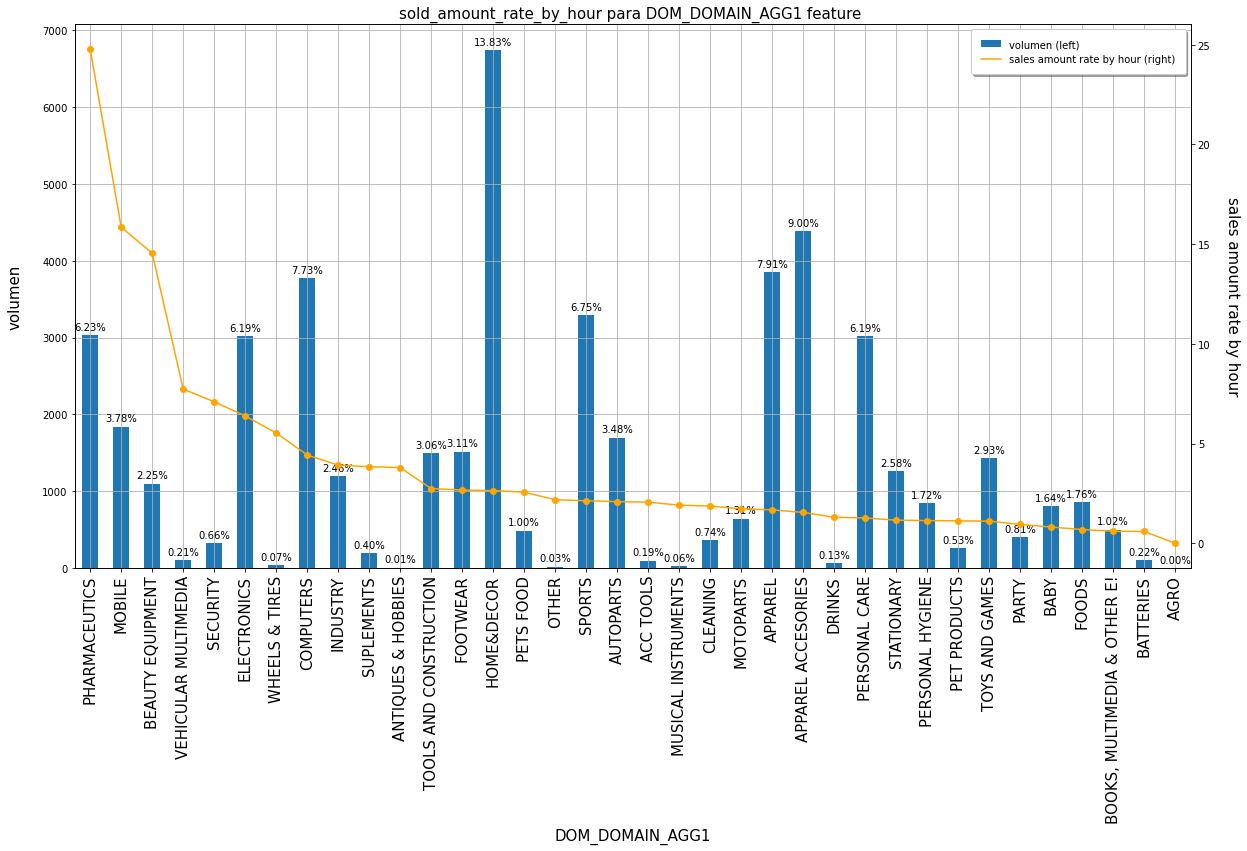

In [23]:
plot_bivariant(iv_df, 'DOM_DOMAIN_AGG1', 'DOM_DOMAIN_AGG1','sold_amount_rate_by_hour')

In [69]:
print("Dominios agregados para Beauty & Health: \n")
print(df[df['VERTICAL']=='BEAUTY & HEALTH'][['DOM_DOMAIN_AGG1']].value_counts().index.values.tolist())

Dominios agregados para Beauty & Health: 

[('PHARMACEUTICS',), ('PERSONAL CARE',), ('BEAUTY EQUIPMENT',)]


In [68]:
print("Dominios agregados para CE: \n")
print(df[df['VERTICAL']=='CE'][['DOM_DOMAIN_AGG1']].value_counts().index.values.tolist())
print("\n")

Dominios agregados para CE: 

[('COMPUTERS',), ('ELECTRONICS',), ('MOBILE',)]




Hay tres DOM_DOMAIN_AGG1 con una performance bastante superior al resto, en este orden:

    1. Pharmaceutics (de BEAUTY & HEALTH, de esperar ya que esta vertical es la de mayor rate)
    2. Mobile (de CE, de esperar ya que esta vertical es la de segunda mayor rate)
    3. Beauty Equipment (de BEAUTY & HEALTH, de esperar ya que esta vertical es la de mayor rate)
    

Por otro lado, HOME&DECOR es la que presenta mayor volumen de ventas

#### TOP 3 DOM_DOMAIN_AGG1

Vamos a ver con mas profundidad la performance de cada dominio dentro del top 3 de los Dominios Agregados

Plotting chart for DOM_DOMAIN_AGG1 = PHARMACEUTICS


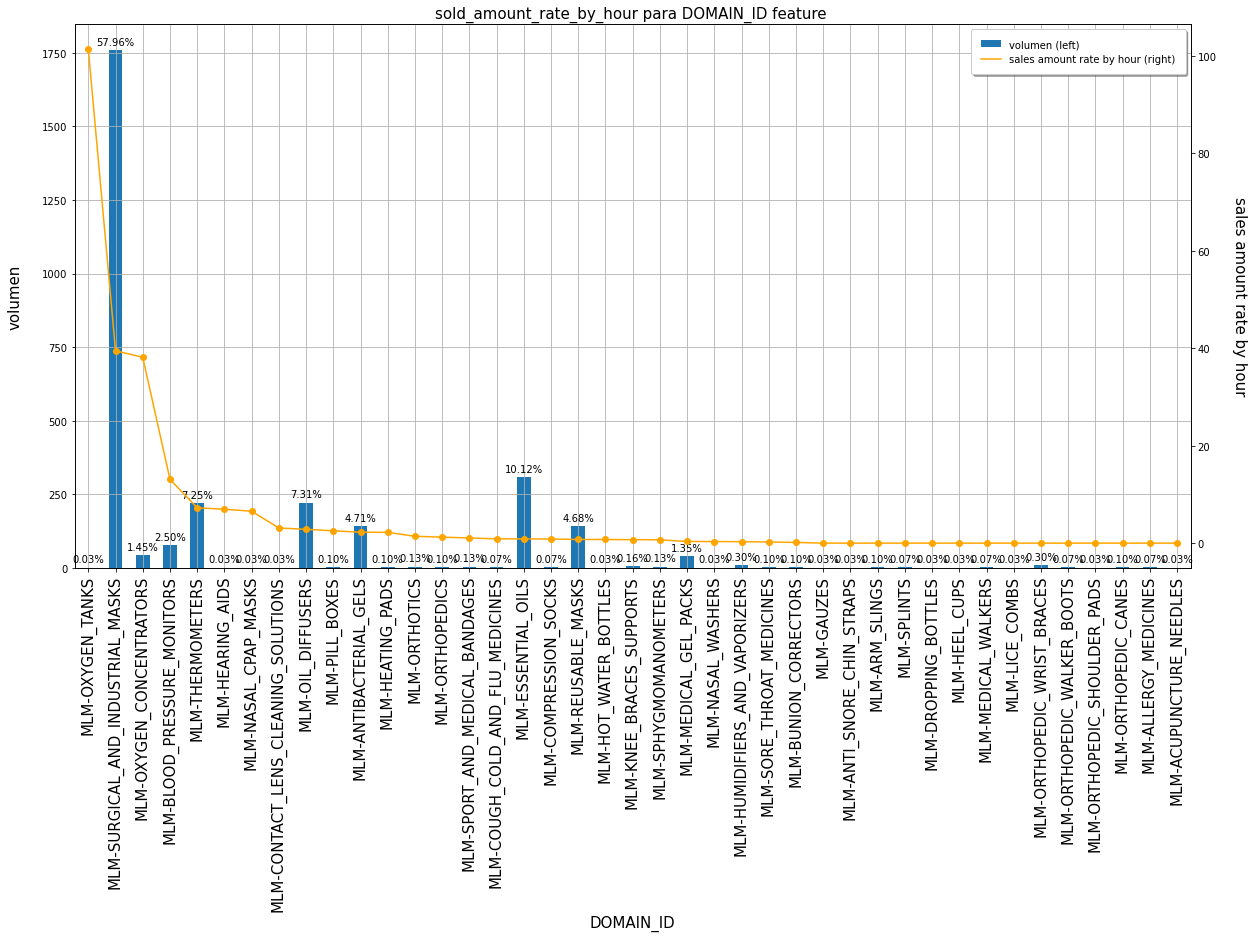


Plotting chart for DOM_DOMAIN_AGG1 = MOBILE


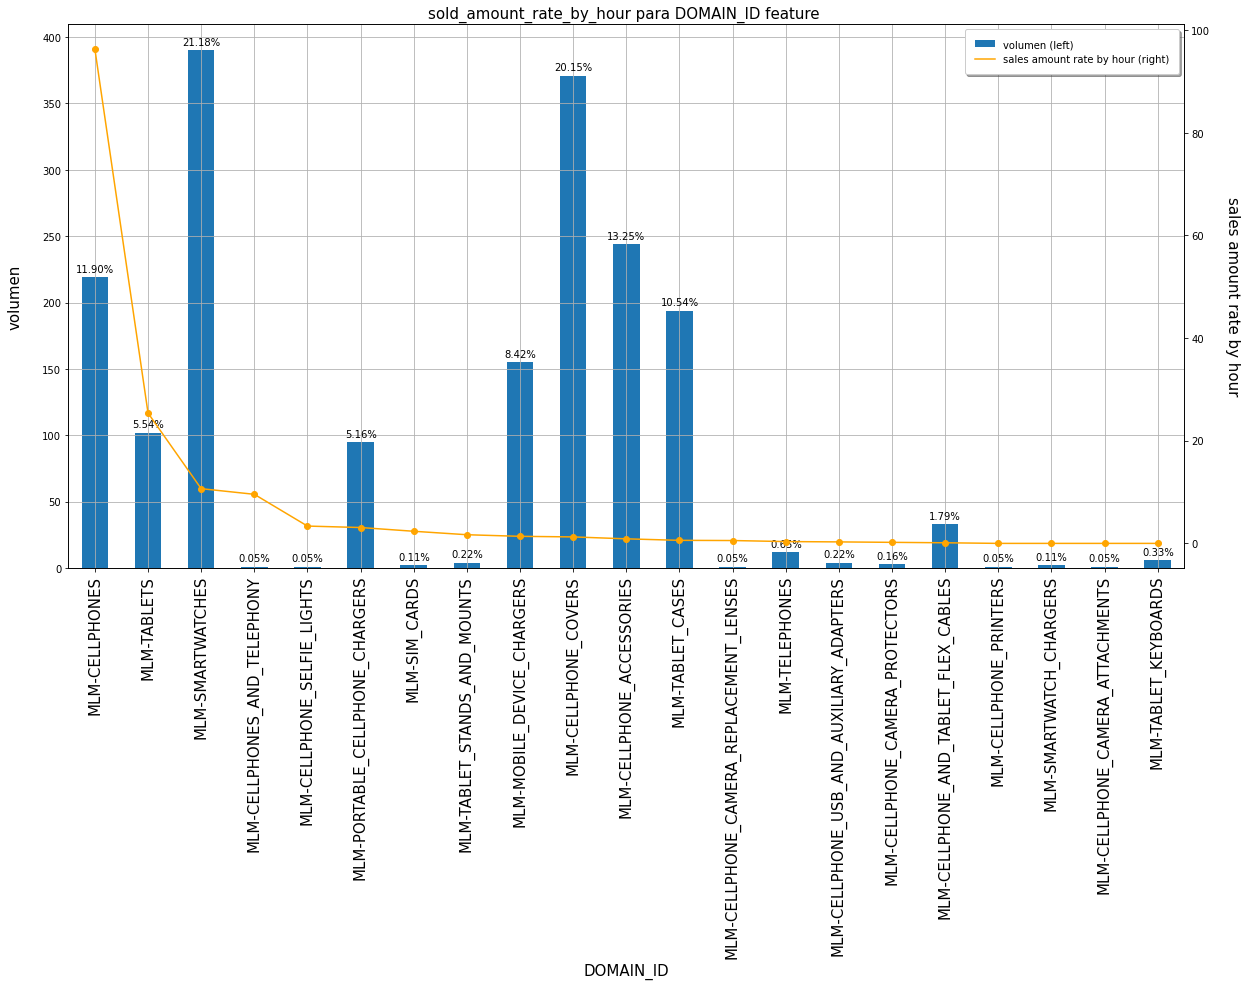


Plotting chart for DOM_DOMAIN_AGG1 = BEAUTY EQUIPMENT


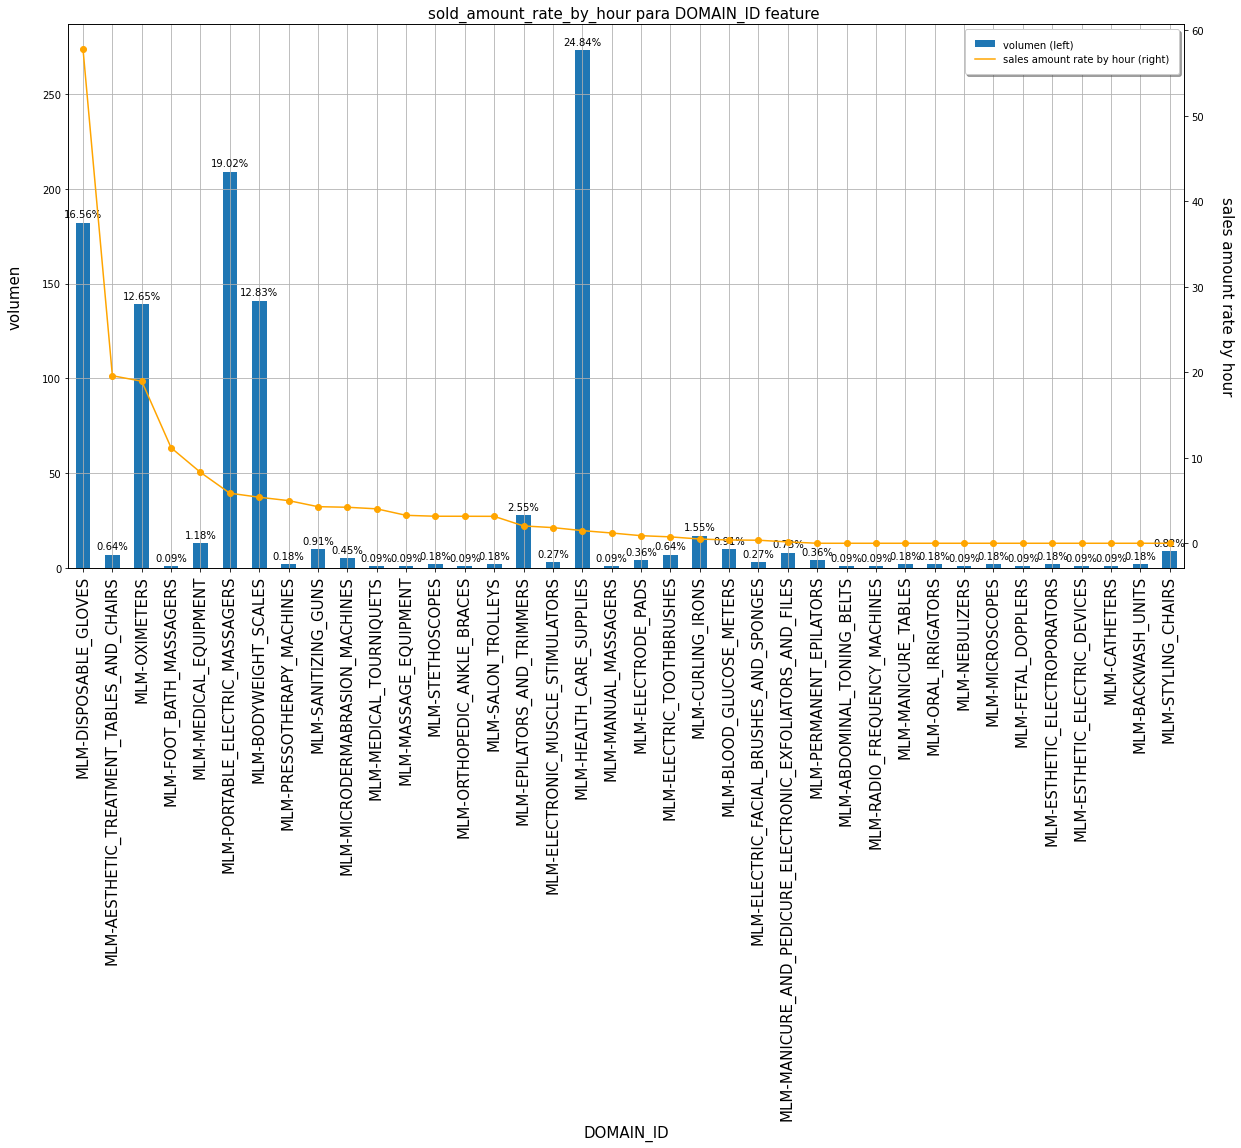

In [24]:
for DOM_DOMAIN_AGG1 in iv_df.sort_values(by='EVENT_RATE',ascending=False)['MIN_VALUE'].head(3).values:
    iv_df , iv = (data_vars(df[df['DOM_DOMAIN_AGG1']==DOM_DOMAIN_AGG1][['DOMAIN_ID']],df[df['DOM_DOMAIN_AGG1']==DOM_DOMAIN_AGG1]['sold_amount_rate_by_hour']))
    print('Plotting chart for DOM_DOMAIN_AGG1 = '  + DOM_DOMAIN_AGG1)
    plot_bivariant(iv_df, 'DOMAIN_ID', 'DOMAIN_ID','sold_amount_rate_by_hour')
    print('===============================================================================================================  \n' )


**Los tanques de oxigeno, los celulares y los DISPOSABLE_GLOVES son los que tuvieron una mayor tasa de monto de venta dentro de cada uno de los tres dominios, respectivamente**

#### offer_day

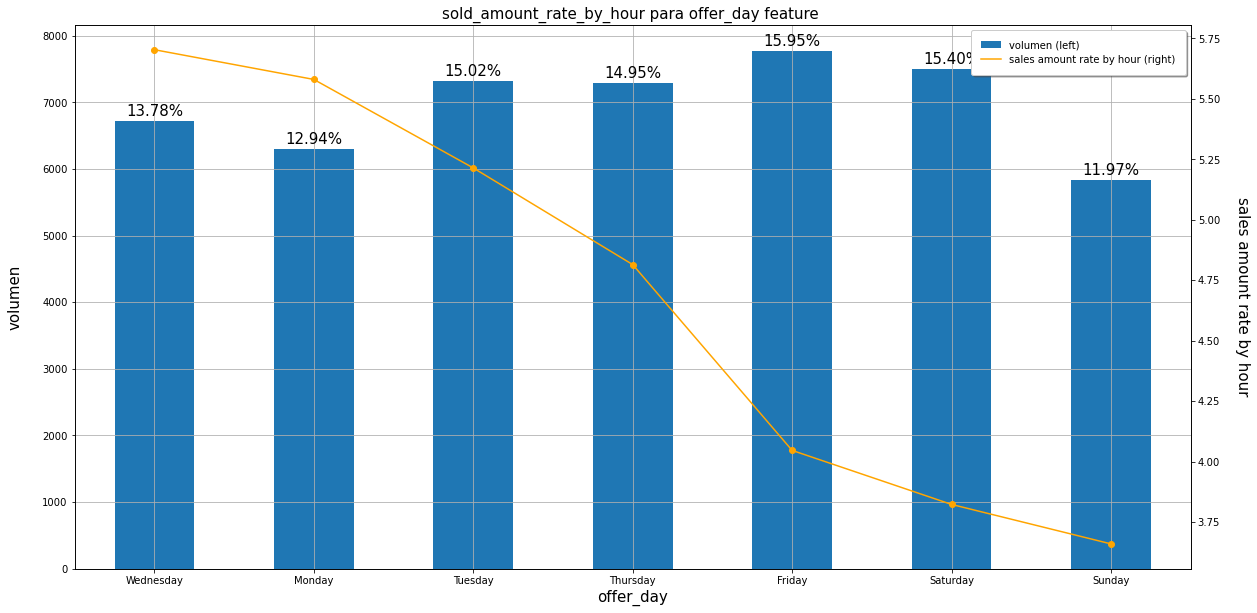

In [26]:
iv_df , _ = data_vars(df[['offer_day']],df['sold_amount_rate_by_hour'])
plot_bivariant(iv_df, 'offer_day', 'offer_day','sold_amount_rate_by_hour')

Los dias de semana son los que presetan un mejor rendimiento en monto por unidad de de tiempo, con una tendencia bien definida.

El volumen de ofertas se distribuye casi equitativamente entre los diferentes dias.

#### offer_start_hour

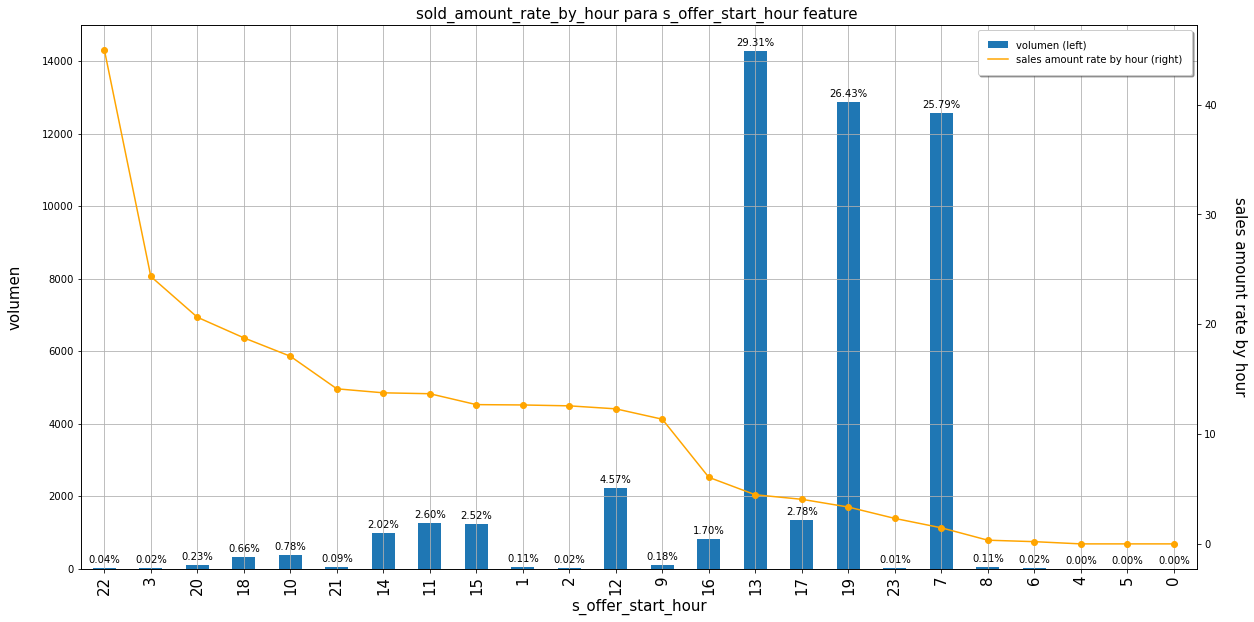

In [27]:
df['s_offer_start_hour'] = df['offer_start_hour'].astype(str)
iv_df , _ = data_vars(df[['s_offer_start_hour']],df['sold_amount_rate_by_hour'])
plot_bivariant(iv_df, 's_offer_start_hour', 's_offer_start_hour','sold_amount_rate_by_hour')

Aqui no vemos un patron claro de franjas horarias, se podemos ver que las 13, las 19 y las 7 son las horas done principalmente comienzan las ofertas, a pesar de no ser las horas de inicio que mejor performan

### Caso 2: sold_quantity_rate_by_hour

Aqui vamos a realizar todo el analisis pero para la tasa de cantidad de ventas (en vez de monto)

In [33]:
iv_df , iv = data_vars(df[['SHIPPING_PAYMENT_TYPE','VERTICAL','DOM_DOMAIN_AGG1']],df['sold_quantity_rate_by_hour'])

#### VERTICAL

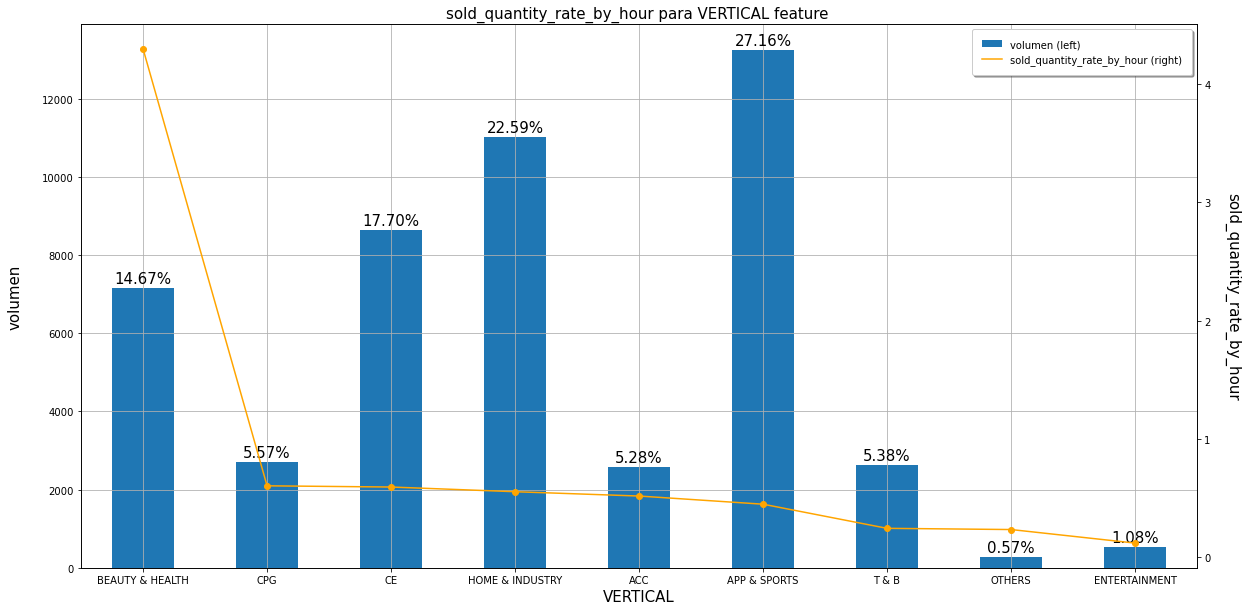

In [19]:
plot_bivariant(iv_df, 'VERTICAL', 'VERTICAL','sold_quantity_rate_by_hour')

- En lo que refiere estrictamente a la tasa de cantidades vendidas por vertical vemos que Beauty & Health esta clarmanete separada del resto. Es la que mas cantidad vendio por unidad de tiempo.
- El resto de las vertical tuvieron una perfomance similar

#### SHIPPING_PAYMENT_TYPE

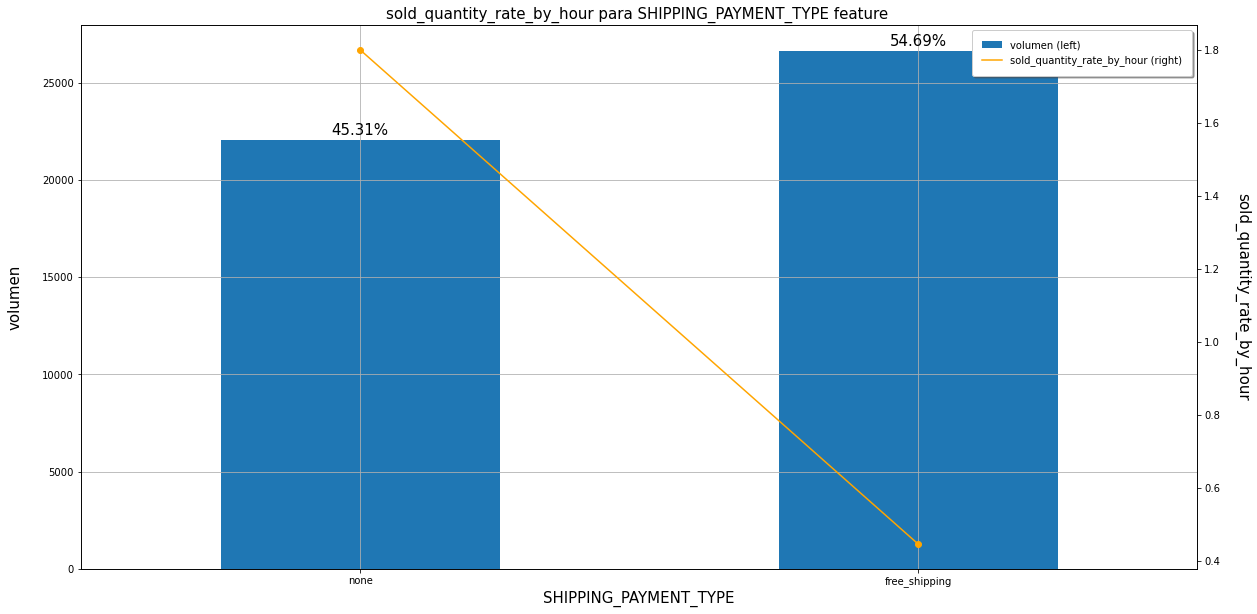

In [22]:
plot_bivariant(iv_df, 'SHIPPING_PAYMENT_TYPE', 'SHIPPING_PAYMENT_TYPE','sold_quantity_rate_by_hour')

En termino de unidades se revierte la perfomance respecto a lo que vimos en la tasa de monto vendido.

#### DOM_DOMAIN_AGG1

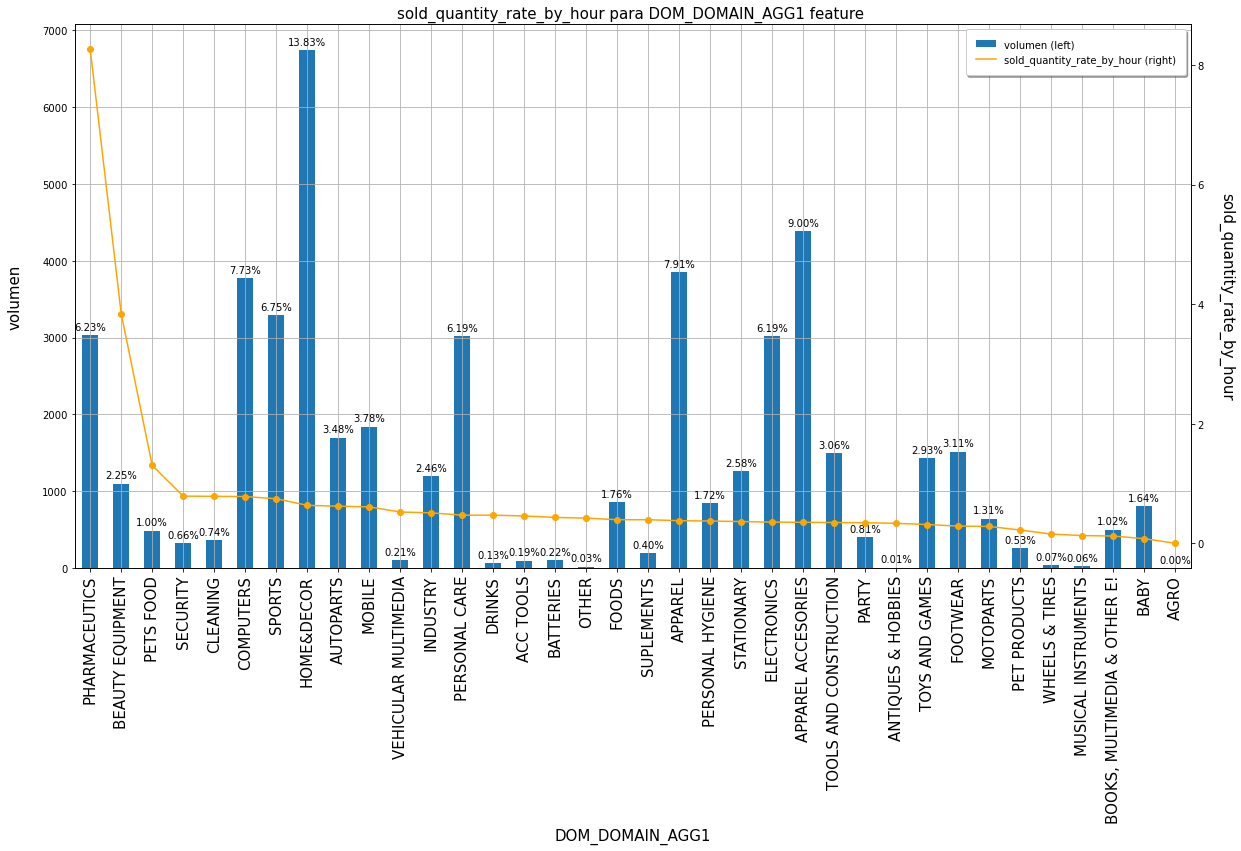

In [23]:
plot_bivariant(iv_df, 'DOM_DOMAIN_AGG1', 'DOM_DOMAIN_AGG1','sold_quantity_rate_by_hour')

Hay dos DOM_DOMAIN_AGG1 con una performance bastante superior al resto en lo que refiere a cantidad de unidades vendidas, en este orden:

    1. Pharmaceutics (de BEAUTY & HEALTH, de esperar ya que esta vertical es la de mayor rate)
    2. Beauty Equipment (de BEAUTY & HEALTH, de esperar ya que esta vertical es la de mayor rate)
Las dos corresponde a la vertical de BEAUTY & HEALTH

#### TOP 2 DOM_DOMAIN_AGG1

Vamos a ver con mas profundidad la performance de cada dominio dentro del top 3 de los Dominios Agregados

Plotting chart for DOM_DOMAIN_AGG1 = PHARMACEUTICS


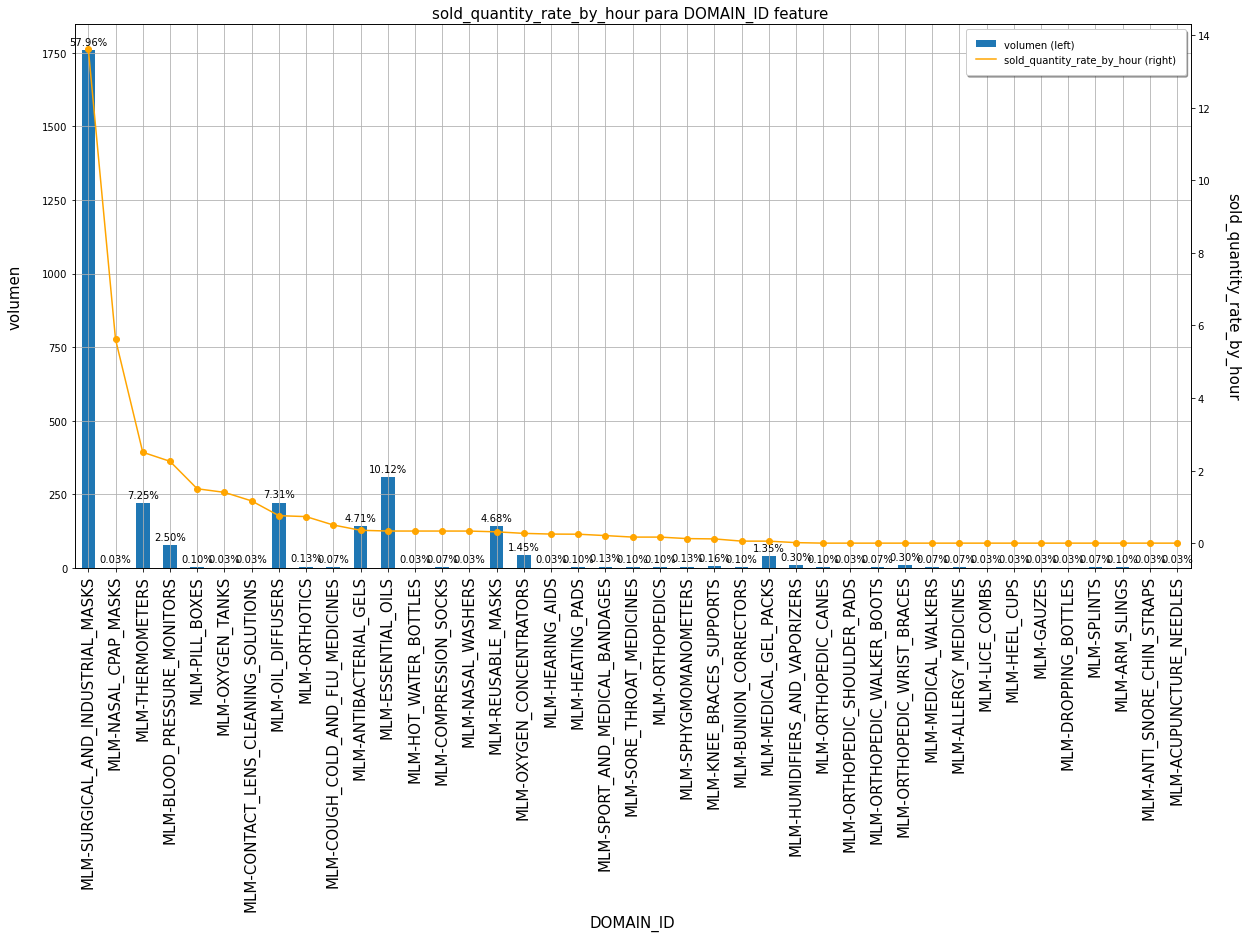


Plotting chart for DOM_DOMAIN_AGG1 = BEAUTY EQUIPMENT


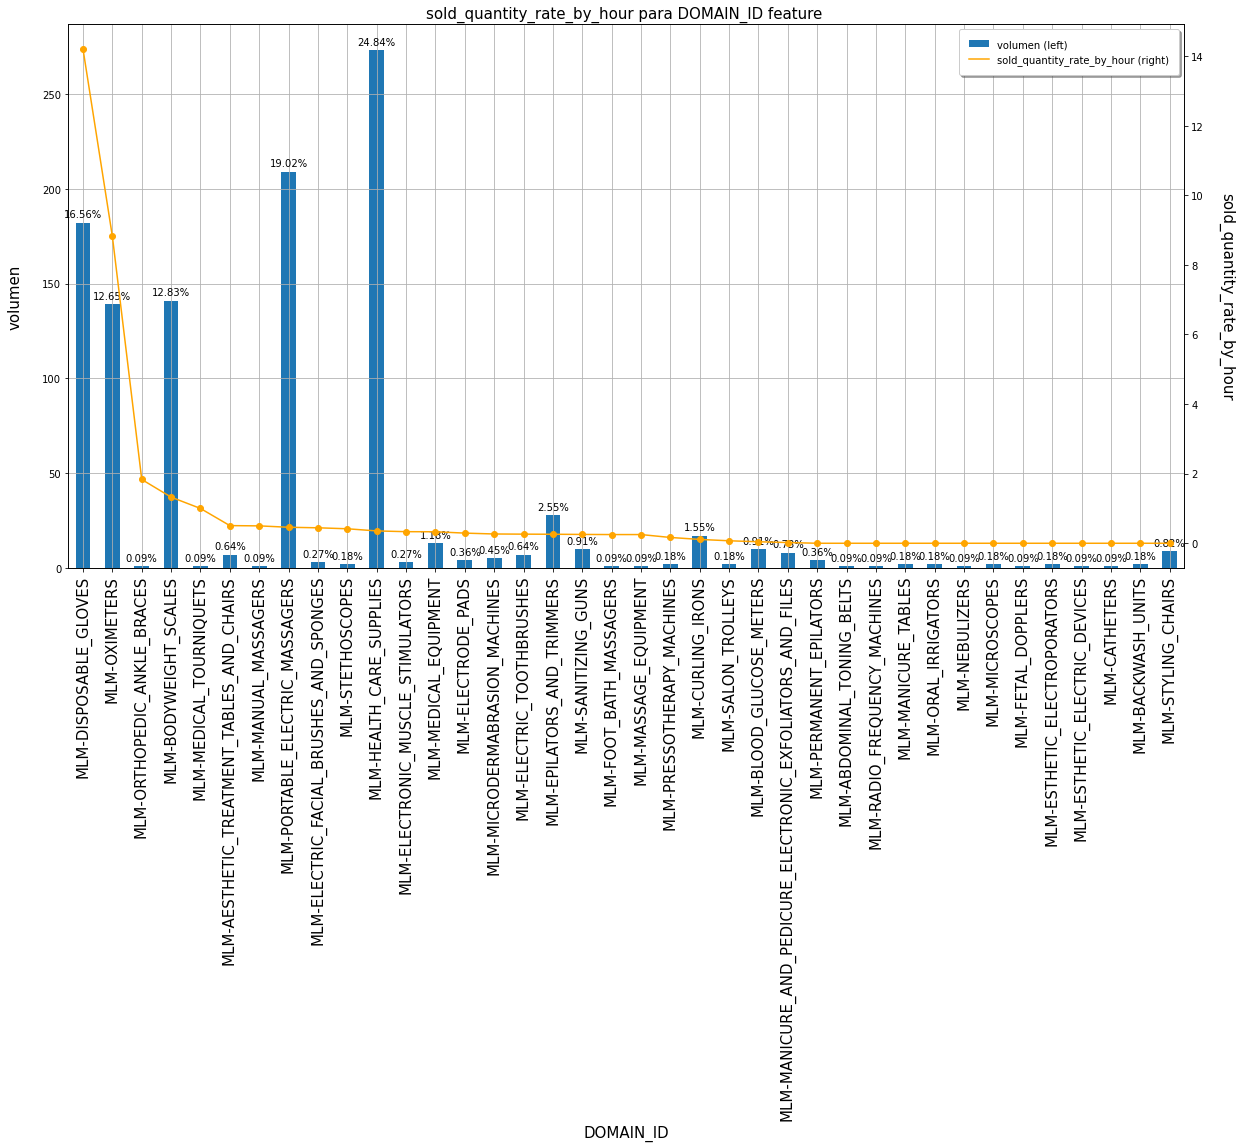

In [34]:
for DOM_DOMAIN_AGG1 in iv_df[iv_df['VAR_NAME']=='DOM_DOMAIN_AGG1'].sort_values(by='EVENT_RATE',ascending=False)['MIN_VALUE'].head(2).values:
    iv_df , iv = (data_vars(df[df['DOM_DOMAIN_AGG1']==DOM_DOMAIN_AGG1][['DOMAIN_ID']],df[df['DOM_DOMAIN_AGG1']==DOM_DOMAIN_AGG1]['sold_quantity_rate_by_hour']))
    print('Plotting chart for DOM_DOMAIN_AGG1 = '  + DOM_DOMAIN_AGG1)
    plot_bivariant(iv_df, 'DOMAIN_ID', 'DOMAIN_ID','sold_quantity_rate_by_hour')
    print('===============================================================================================================  \n' )

**Los Surgical & Industrial Masks los DISPOSABLE_GLOVES son los que tuvieron una mayor tasa de monto de venta dentro de cada uno de los dos dominios, respectivamente**

#### offer_day

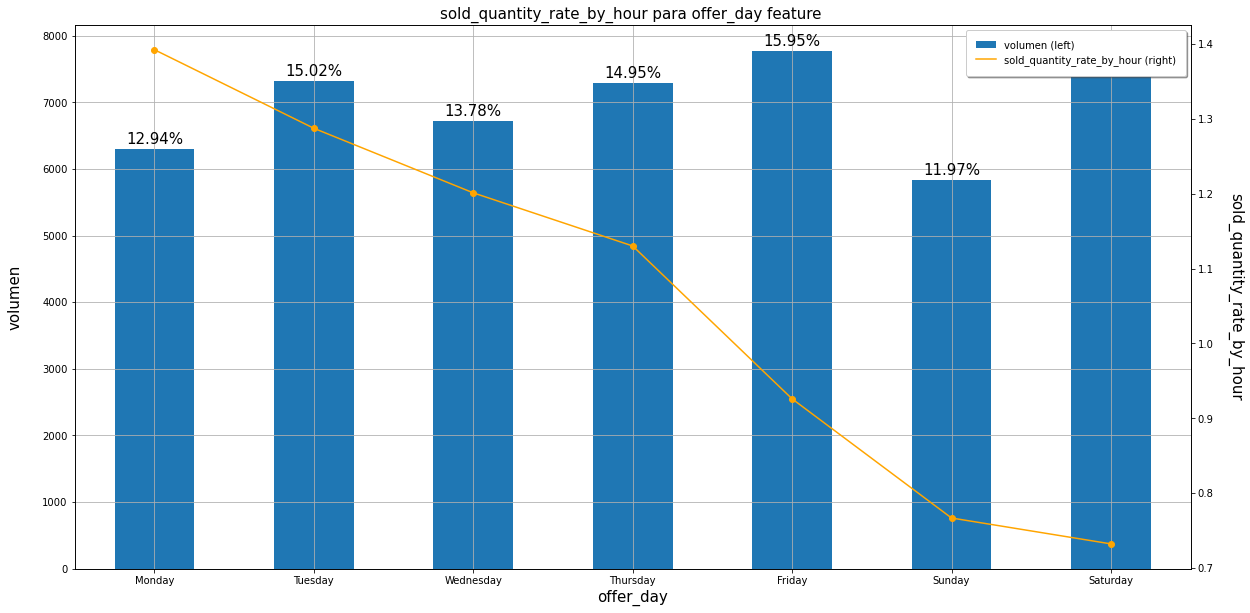

In [25]:
iv_df , _ = data_vars(df[['offer_day']],df['sold_quantity_rate_by_hour'])
plot_bivariant(iv_df, 'offer_day', 'offer_day','sold_quantity_rate_by_hour')

Aqui tambien vemos que los dias de semana son los que presetan un mejor rendimiento en cantidad vendida por unidad de de tiempo, con una tendencia bien definida.

#### offer_start_hour

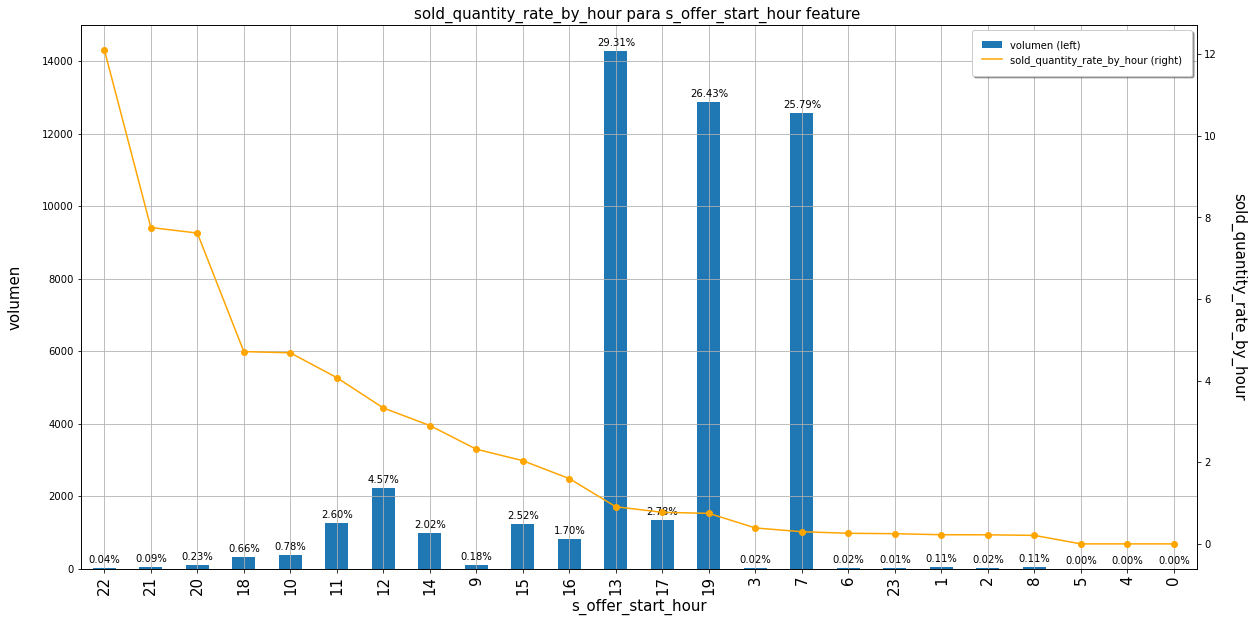

In [32]:
iv_df , _ = data_vars(df[['s_offer_start_hour']],df['sold_quantity_rate_by_hour'])
plot_bivariant(iv_df, 's_offer_start_hour', 's_offer_start_hour','sold_quantity_rate_by_hour')

Hay un claro patron de performance que muestra a las 20, 21 y 22 hs como las mejores horas (si miramos cantidad vendida por unidad de tiempo) de inicio de ofertas